# Ignore Warnings

In [1]:
import warnings
warnings.filterwarnings("ignore")

# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import torch
from torch.autograd import Variable
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import datasets
import matplotlib.pyplot as plt

from gradient_descent import LinearRegression
from sklearn.linear_model import LinearRegression as Lr_skl
from with_pytorch import LinearRegression as Lr_torch
from with_tf import LinearRegression as Lr_tf

# Init dataset with random values

In [3]:
x, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)

# Split into test and train parts

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Predict with custom model

In [5]:
model_grd = LinearRegression(n_iters=10000)
model_grd.fit(x_train, y_train)
y_predicted_by_grd = model_grd.predict(x_test)
mse_value_grd = mean_squared_error(y_test, y_predicted_by_grd)

# Predict with sklearn model

In [6]:
model_skl = Lr_skl()
model_skl.fit(x_train, y_train)
y_predicted_by_skl = model_skl.predict(x_test)
mse_value_skl = mean_squared_error(y_test, y_predicted_by_skl)

# Predict with PyTorch implemented model

### Create model with init params

In [7]:
input_size = 1
output_size = 1
learning_rate = 0.00001
epochs = 1000

model_torch = Lr_torch(input_size, output_size)

### Optimize and Train the Model

In [8]:
criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model_torch.parameters(), lr=learning_rate)

In [9]:
for epoch in range(epochs):
    inputs = Variable(torch.from_numpy(x_train))
    labels = Variable(torch.from_numpy(y_train))

In [10]:
optimizer.zero_grad()
outputs = model_torch(inputs.float())
loss = criterion(outputs, labels.float())
loss.backward()
optimizer.step()

In [11]:
with torch.no_grad():
    y_predicted_by_torch = model_torch(Variable(torch.from_numpy(x_test)).float()).data.numpy()

In [12]:
mse_value_torch = mean_squared_error(y_test, y_predicted_by_torch)

# Predict with Tensrflow Implemented model

In [13]:
model_tf = Lr_tf()
model_tf.fit(x_train, y_train)
y_predicted_by_tf = model_tf.predict(x_test)
mse_value_tf = mean_squared_error(y_test, y_predicted_by_tf)

# The graph of Predicted and true values

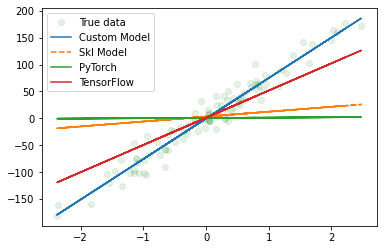

In [17]:
plt.clf()
plt.plot(x, y, 'go', label='True data', alpha=0.1)
plt.plot(x_test, y_predicted_by_grd, label='Custom Model')
plt.plot(x_test, y_predicted_by_skl, '--', label='Skl Model')
plt.plot(x_test, y_predicted_by_torch, label='PyTorch')
plt.plot(x_test, y_predicted_by_tf, label='TensorFlow')
plt.legend(loc='best')
plt.show()

# Mean squared errors colculated by both

In [18]:
print(f'mse value by grd = {mse_value_grd}')
print(f'mse value by skl = {mse_value_skl}')
print(f'mse value by pytorch = {mse_value_torch}')
print(f'mse value by tensorflow = {mse_value_tf}')

mse value by grd = 202.01097832522123
mse value by skl = 6270.139801058191
mse value by pytorch = 7938.486156805229
mse value by tensorflow = 999.2495496510652
